In [1]:
from google.colab import drive
drive.mount("/content/mydrive")

Mounted at /content/mydrive


In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv("/content/mydrive/MyDrive/ML-VEC/daily_csv.csv")

In [4]:
dataset

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [6]:
dataset.isnull().any()

Date     False
Price     True
dtype: bool

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5953 non-null   object 
 1   Price   5952 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.1+ KB


In [8]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset["day"]  = pd.DatetimeIndex(dataset["Date"]).day

In [9]:
dataset

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13
...,...,...,...,...,...
5948,2020-08-26,2.52,2020,8,26
5949,2020-08-27,2.52,2020,8,27
5950,2020-08-28,2.46,2020,8,28
5951,2020-08-31,2.30,2020,8,31


In [10]:
dataset.isnull().any()

Date     False
Price     True
year     False
month    False
day      False
dtype: bool

In [11]:
dataset["Price"].fillna(dataset["Price"].mean(),inplace=True)

In [12]:
dataset.isnull().any()

Date     False
Price    False
year     False
month    False
day      False
dtype: bool

No handles with labels found to put in legend.


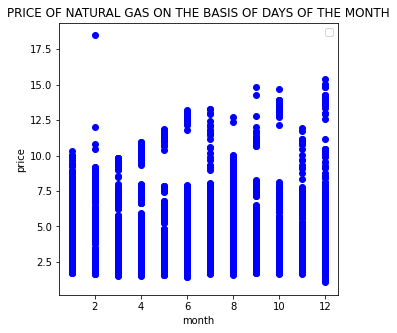

In [13]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(5,5))
plt.scatter(dataset["month"],dataset["Price"],color="blue")
plt.xlabel("month")
plt.ylabel("price")
plt.title("PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF THE MONTH")
plt.legend()

No handles with labels found to put in legend.


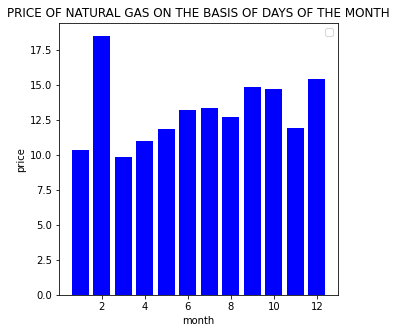

In [14]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(5,5))
plt.bar(dataset["month"],dataset["Price"],color="blue")
plt.xlabel("month")
plt.ylabel("price")
plt.title("PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF THE MONTH")
plt.legend()

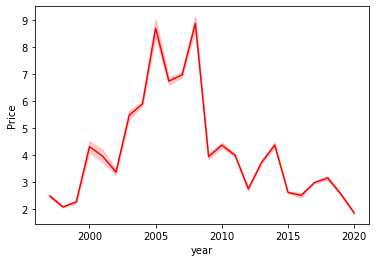

In [17]:
import seaborn as sns
sns.lineplot(x="year",y="Price",data=dataset,color="red")

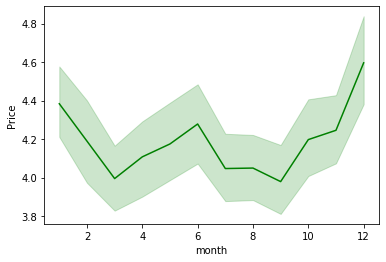

In [18]:
import seaborn as sns
sns.lineplot(x="month",y="Price",data=dataset,color="green")

No handles with labels found to put in legend.


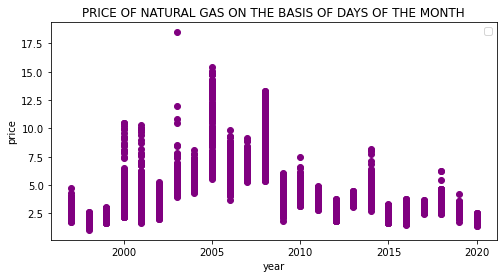

In [19]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(8,4))
plt.scatter(dataset["year"],dataset["Price"],color="purple")
plt.xlabel("year")
plt.ylabel("price")
plt.title("PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF THE MONTH")
plt.legend()

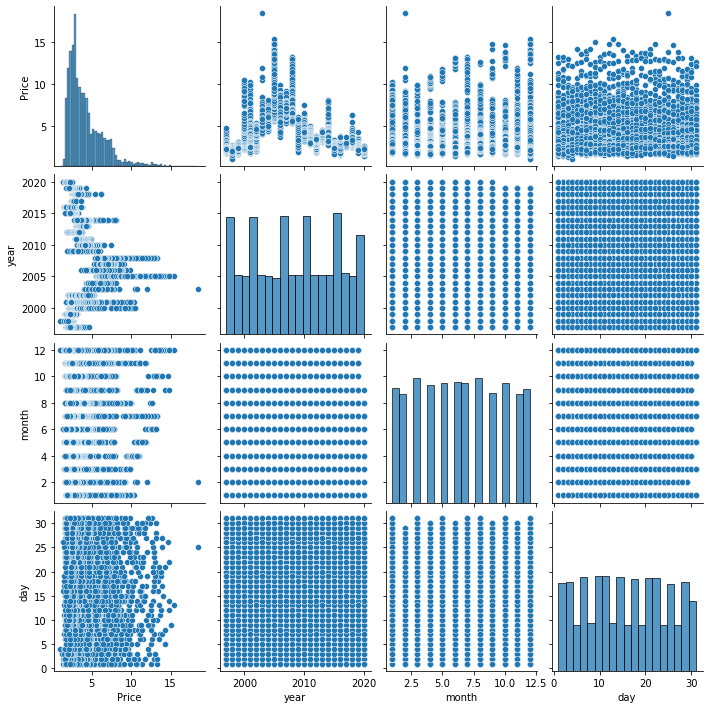

In [20]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

In [21]:
dataset.drop("Date",axis=1,inplace=True)

In [22]:
dataset

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5948,2.52,2020,8,26
5949,2.52,2020,8,27
5950,2.46,2020,8,28
5951,2.30,2020,8,31


In [23]:
x=dataset.iloc[:,1:4]
y=dataset.iloc[:,0]

In [24]:
x


,year,month,day
0,1997,1,7
1,1997,1,8
2,1997,1,9
3,1997,1,10
4,1997,1,13
...,...,...,...
5948,2020,8,26
5949,2020,8,27
5950,2020,8,28
5951,2020,8,31


In [25]:
y

0       3.82
1       3.80
2       3.61
3       3.92
4       4.00
        ... 
5948    2.52
5949    2.52
5950    2.46
5951    2.30
5952    2.22
Name: Price, Length: 5953, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [28]:
ypred=dtr.predict(x_test)

In [29]:
ypred

array([2.29, 3.24, 1.8 , ..., 3.42, 4.9 , 2.66])

In [ ]:
y_test

134      2.26
1364     3.23
555      1.79
4144     3.49
2858    12.76
        ...  
1547     5.71
2857    13.09
3957     3.40
3364     4.88
5595     2.62
Name: Price, Length: 1191, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
accuracy=r2_score(ypred,y_test)

In [ ]:
accuracy

0.9780116990128993

In [ ]:
import pickle
pickle.dump(dtr,open("dtr.pkl","wb"))#wb write binary

In [ ]:
from joblib import dump
dump(dtr,"dtr.save")

['dtr.save']